In [70]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

<IPython.core.display.Javascript object>


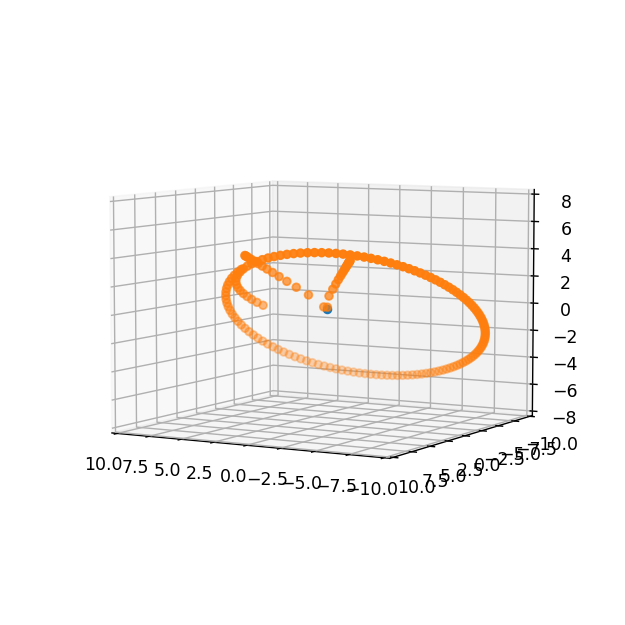

 11%|█▏        | 16/140 [00:02<00:18,  6.57it/s]

1
1


100%|██████████| 140/140 [00:21<00:00,  6.40it/s]


In [71]:
class Star:
    def __init__(self, mass, vec_p):
        self.mass = mass
        self.destroyed = False
        self.vec_p = vec_p
class CosmicBody:
    x_cor = []
    y_cor = []
    z_cor = []
    def __init__(self, mass, vec_v, vec_p):
        self.mass = mass
        self.vec_v = vec_v
        self.vec_p = vec_p
        self.destroyed = False
        self.trace = []
        self.x_cor.append(self.vec_p[0])
        self.y_cor.append(self.vec_p[1])
        self.z_cor.append(self.vec_p[2])
    def gravitate(self, bodies):
        dv = 0
        for body in bodies:
            if body.destroyed == False and body != self:
                dv += 6.7 * (10 ** (-2)) * body.mass * dt * (- self.vec_p + body.vec_p) / ((np.linalg.norm(self.vec_p - body.vec_p) ** 3)) 
        self.vec_v += dv
    def destroy(self):
        self.destroyed = True
        print(1)
    
    def step(self, dt):
        self.vec_p += self.vec_v * dt
        self.trace.append(self.vec_p)
        self.x_cor.append(self.vec_p[0])
        self.y_cor.append(self.vec_p[1])
        self.z_cor.append(self.vec_p[2])

        
dt = 5e-2
t0 = 7
star = Star(10000, np.array([0, 0, 0]))
body_1 = CosmicBody(1000, np.array([0., 0., 0.]), np.array([-4., 4., 4.]))
body_2 = CosmicBody(1000, np.array([0., 0., 0.]), np.array([4., 4., 4.]))
body_3 = CosmicBody(10, np.array([5., 10., 5.]), np.array([5., 0., 0.]))
bodies = [body_1, body_2, body_3]
stars = [star]

%matplotlib notebook
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(-10, 10)
ax.axes.set_ylim3d(-10, 10)
ax.axes.set_zlim3d(-8, 8)    
fig.show()
fig.canvas.draw()


for t in tqdm(np.arange(0., t0, dt)):
    for body in bodies:
        if body.destroyed == False:
            body.gravitate(stars)
            body.gravitate(bodies)

    bodies_to_destroy = []

    for main_body in bodies:
        if main_body.destroyed == False:
            for body in bodies:
                if body != main_body:
                    if body.destroyed == False:
                        if np.linalg.norm(main_body.vec_p - body.vec_p) < 0.5:
                            bodies_to_destroy.append(body)
                            break
                            
    for body in bodies_to_destroy:
        body.destroy()
        
    
    for body in bodies:
        if body.destroyed == False:
            body.step(dt)
    
    angle = 60 + 60 * t / t0
    ax.clear()
    ax.axes.set_xlim3d(-10, 10)
    ax.axes.set_ylim3d(-10, 10)
    ax.axes.set_zlim3d(-8, 8)
    N = int(t / dt)
    ax.scatter(0, 0, 0)
    for body in bodies:
        if body.destroyed == False:
            ax.scatter(body.x_cor, body.y_cor, body.z_cor)
    ax.view_init(30 - angle * 0.2, angle)
    fig.canvas.draw()

          

    